<a href="https://colab.research.google.com/github/Rajaonah01/TeamASH/blob/main/Partie_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Valeurs manquantes :
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


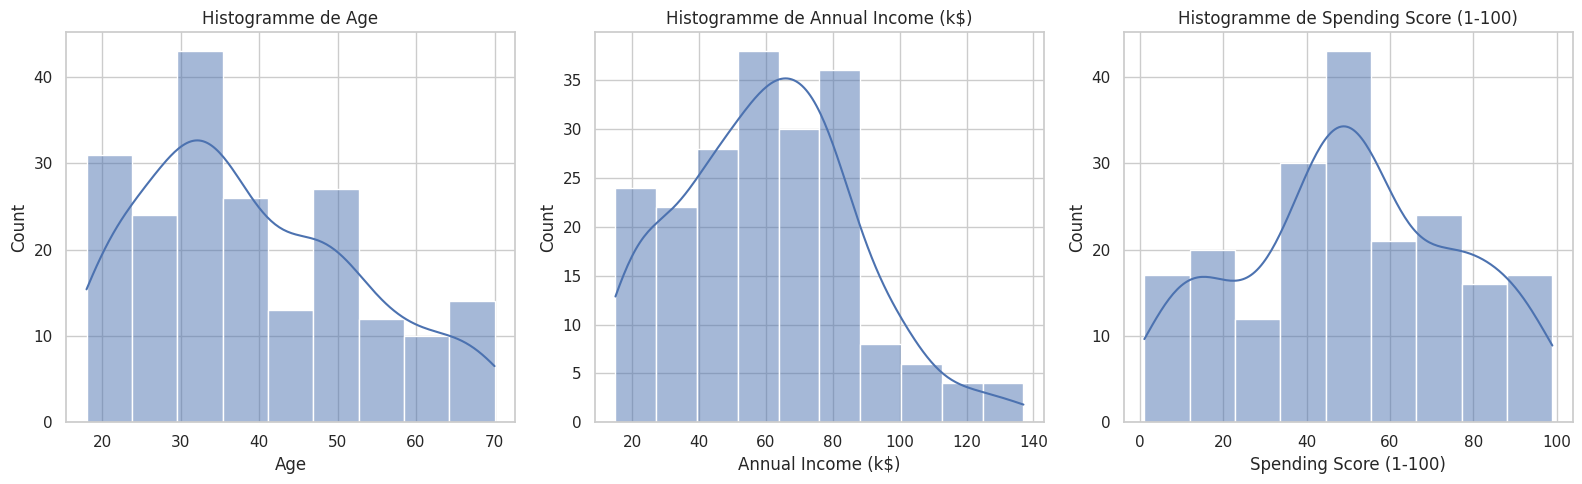

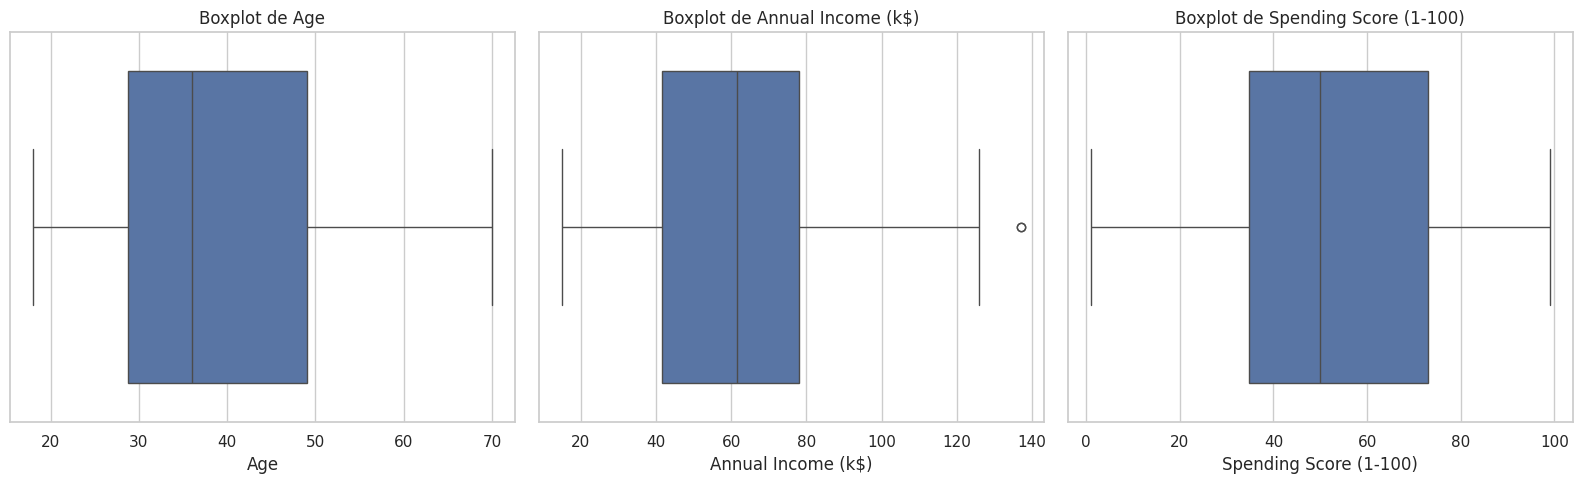

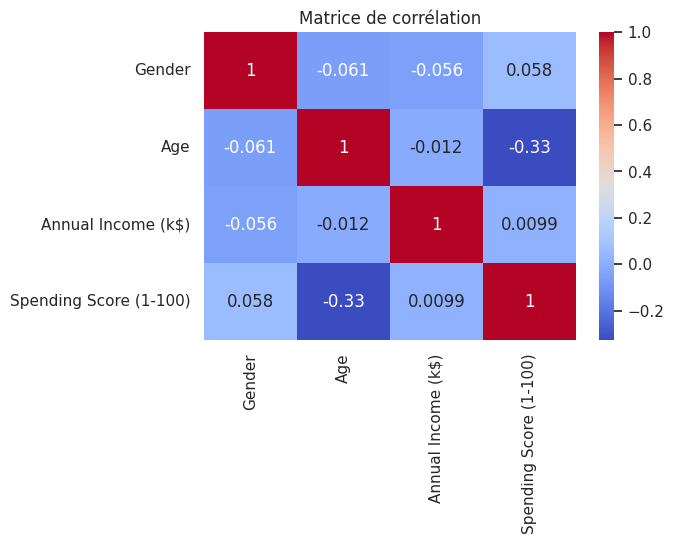

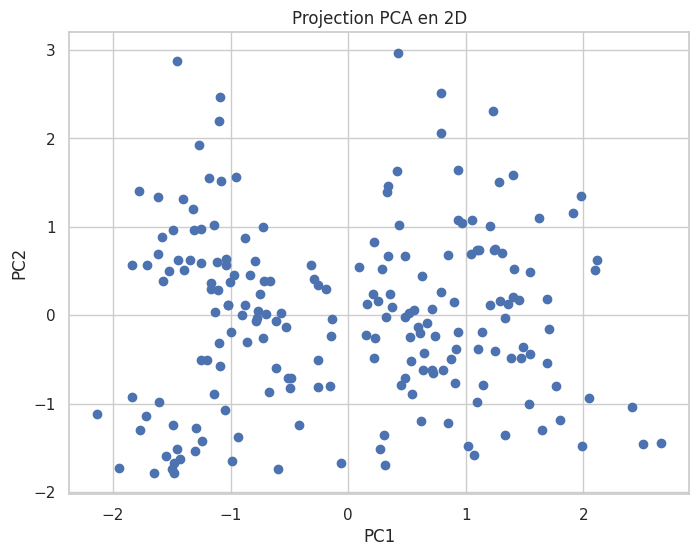

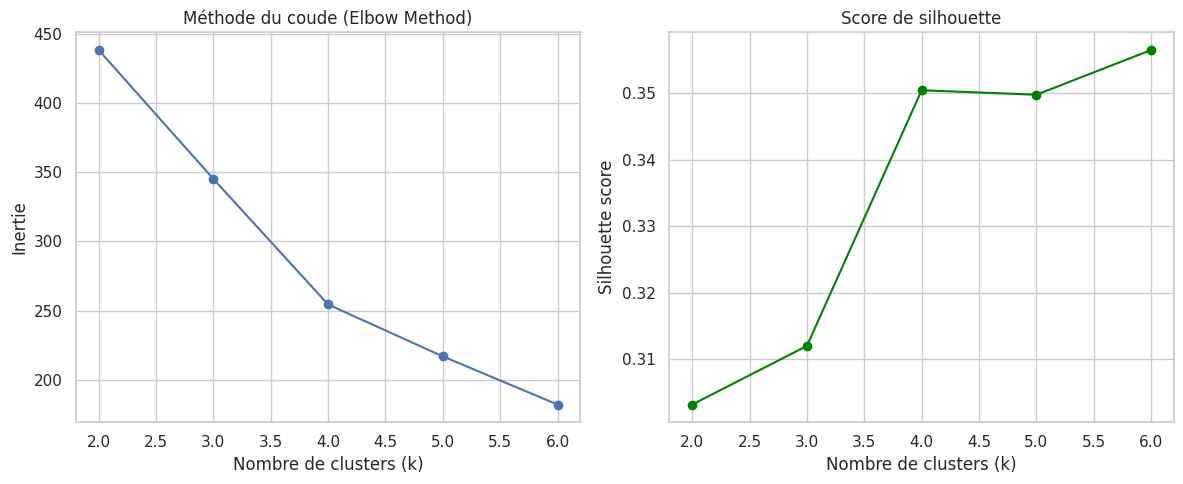

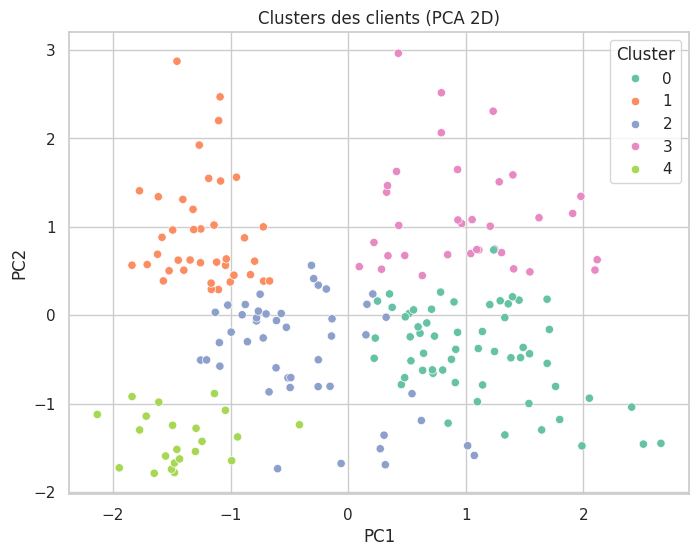

Centroides des clusters :


ValueError: Shape of passed values is (5, 4), indices imply (5, 3)

In [4]:
# Partie A : Clustering - Segmentation de clients

# 1. Chargement des bibliothèques et des données
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Affichage
sns.set(style="whitegrid")

# Chargement des données
df = pd.read_csv("Mall_Customers.csv")
df.head()

# 2. Nettoyage et prétraitement
print("Valeurs manquantes :")
print(df.isnull().sum())

# Suppression de l'identifiant et encodage du genre
df_clean = df.drop("CustomerID", axis=1)
df_clean["Gender"] = df_clean["Gender"].map({"Male": 0, "Female": 1})

# Standardisation
features = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
scaler = StandardScaler()
df_scaled = df_clean.copy()
df_scaled[features] = scaler.fit_transform(df_clean[features])

# 3. Analyse exploratoire univariée et multivariée
plt.figure(figsize=(16, 5))
for i, col in enumerate(features):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogramme de {col}")
plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 5))
for i, col in enumerate(features):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col}")
plt.tight_layout()
plt.show()

# Matrice de corrélation
plt.figure(figsize=(6, 4))
sns.heatmap(df_clean.corr(), annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.show()

# 4. Feature engineering (optionnel ici)
# On garde toutes les features pour le clustering

# 5. PCA pour réduction de dimension
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1])
plt.title("Projection PCA en 2D")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# 6. Clustering avec KMeans et évaluation (Elbow & Silhouette)
inertias = []
silhouettes = []
k_range = range(2, 7)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(df_scaled, kmeans.labels_))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, marker='o')
plt.title("Méthode du coude (Elbow Method)")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertie")

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouettes, marker='o', color='green')
plt.title("Score de silhouette")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Silhouette score")
plt.tight_layout()
plt.show()

# 7. Clustering final avec k=5 (par exemple)
k_final = 5
kmeans_final = KMeans(n_clusters=k_final, random_state=42)
clusters = kmeans_final.fit_predict(df_scaled)

# Ajout des clusters
df_clean["Cluster"] = clusters

# Visualisation PCA colorée par cluster
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=clusters, palette="Set2")
plt.title("Clusters des clients (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.show()

# 8. Interprétation des clusters
print("Centroides des clusters :")
centroids = pd.DataFrame(kmeans_final.cluster_centers_, columns=features)
print(centroids)

# 9. Conclusion
print("\nConclusion :")
print("Le clustering a permis d’identifier des groupes de clients aux profils distincts basés sur l’âge, le revenu annuel et le score de dépense. Ces informations peuvent servir à cibler des campagnes marketing plus efficacement. Une amélioration future pourrait inclure d’autres sources de données (habitudes d’achat, fréquence de visite, etc.).")
